In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [63]:
df = pd.read_csv("car_data.csv")
insured = df.copy()

# Data preprocessing
## Data cleaning

In [64]:
insured.head()
# engineV = engine volume/capacity = in liters

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [65]:
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
None
               Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2

In [66]:
# mean value imputation
insured["EngineV"] = insured["EngineV"].fillna(insured["EngineV"].mean())

In [67]:
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand             0
Price           172
Body              0
Mileage           0
EngineV           0
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4345 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
None
               Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4345.000000  4345.000000
mean    19418.746935   161.237284     2

In [68]:
insured = insured.dropna(subset=["Price"])
# The subset parameter specifies which column(s) to check for NaN values.
# “Remove all rows from the DataFrame insured where the column Price has a missing (NaN) value.”

In [69]:
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4173 non-null   object 
 3   Mileage       4173 non-null   int64  
 4   EngineV       4173 non-null   float64
 5   Engine Type   4173 non-null   object 
 6   Registration  4173 non-null   object 
 7   Year          4173 non-null   int64  
 8   Model         4173 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 326.0+ KB
None
               Price      Mileage      EngineV         Year
count    4173.000000  4173.000000  4173.000000  4173.000000
mean    19418.746935   164.088426     2.765514  2006.367362
st

## Data Transformation

In [70]:
insured2 = insured.copy()
insured["Registration"] = insured["Registration"].map({"yes":1,"no":0})
print(insured.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4173 non-null   object 
 3   Mileage       4173 non-null   int64  
 4   EngineV       4173 non-null   float64
 5   Engine Type   4173 non-null   object 
 6   Registration  4173 non-null   int64  
 7   Year          4173 non-null   int64  
 8   Model         4173 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 326.0+ KB
None


In [71]:
obj_cols = list(insured.select_dtypes("object").columns)
print(obj_cols)
# insured = pd.get_dummies(insured,columns = obj_cols,drop_first=True)
insured = pd.get_dummies(insured,columns = obj_cols)
print(insured)

['Brand', 'Body', 'Engine Type', 'Model']
         Price  Mileage   EngineV  Registration  Year  Brand_Audi  Brand_BMW  \
0       4200.0      277  2.000000             1  1991       False       True   
1       7900.0      427  2.900000             1  1999       False      False   
2      13300.0      358  5.000000             1  2003       False      False   
3      23000.0      240  4.200000             1  2007        True      False   
4      18300.0      120  2.000000             1  2011       False      False   
...        ...      ...       ...           ...   ...         ...        ...   
4340  125000.0        9  3.000000             1  2014       False      False   
4341    6500.0        1  3.500000             1  1999       False       True   
4342    8000.0      194  2.000000             1  1985       False       True   
4343   14200.0       31  2.790734             1  2014       False      False   
4344   13500.0      124  2.000000             1  2013       False      False  

In [72]:
print(insured.info())
print(insured.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 0 to 4344
Columns: 332 entries, Price to Model_Z4
dtypes: bool(327), float64(2), int64(3)
memory usage: 1.5 MB
None
Price           0
Mileage         0
EngineV         0
Registration    0
Year            0
               ..
Model_X6        0
Model_X6 M      0
Model_Yaris     0
Model_Z3        0
Model_Z4        0
Length: 332, dtype: int64


# Modeling

## Train Test Splitting

In [73]:
train,test = train_test_split(insured,train_size=0.8,random_state=1)
x_train = train.drop("Price",axis=1)
y_train = train[["Price"]]
x_test = test.drop("Price",axis=1)
y_test = test[["Price"]]

In [74]:
# x_train
# y_train
x_test 
# y_test 
# test

,Mileage,EngineV,Registration,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
2842,136,2.00,1,2008,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
539,270,2.50,0,2000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
669,151,2.00,1,2010,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3167,54,4.66,1,2015,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3664,127,1.60,1,2006,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,135,3.00,1,2004,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2610,173,5.00,1,2007,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2267,0,1.50,1,2016,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
574,23,3.00,1,2013,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Training

In [76]:
lr = LinearRegression()
sc = StandardScaler()
pipeline = Pipeline([
    ("scaler",sc),
    ("model",lr)
])
lr_model = pipeline.fit(x_train,y_train)

## Testing

In [77]:
print(x_test.head(1))
print(lr_model.predict(x_test.head(1)))

      Mileage  EngineV  Registration  Year  Brand_Audi  Brand_BMW  \
2842      136      2.0             1  2008       False      False   

      Brand_Mercedes-Benz  Brand_Mitsubishi  Brand_Renault  Brand_Toyota  ...  \
2842                False              True          False         False  ...   

      Model_Vito  Model_X1  Model_X3  Model_X5  Model_X5 M  Model_X6  \
2842       False     False     False     False       False     False   

      Model_X6 M  Model_Yaris  Model_Z3  Model_Z4  
2842       False        False     False     False  

[1 rows x 331 columns]
[[7322.3625866]]


In [78]:
# 'Mileage','EngineV','Registration','Year','Brand_..', 'Body_..', 'Engine Type_..', 'Model_...' = sequence during training
features = x_test.head(1).columns
brands = []
body_types = []
engine_types = []
models = []
for each in features:
    if each.startswith("Brand_"):
        brands.append(each)
    elif each.startswith("Body_"):
        body_types.append(each)
    elif each.startswith("Engine Type_"):
        engine_types.append(each)
    elif each.startswith("Model_"):
        models.append(each)  
# print(brands)
# print(body_types)
# print(engine_types)
# print(models)

# handling numerical features
mileage = int(input("Enter Mileage = "))
ev = int(input("Enter Engine Volume = "))
reg = int(input("Enter Registration(1 if yes, 0 if no) = "))
year = int(input("Enter Year = "))
num_features = {"Mileage":[mileage],"EngineV":[ev],"Registration":[reg],"Year":[year]}

# handling categorical features
brand = "Brand_" + input("Enter Brand = ")
body = "Body_" + input("Enter Body = ")
et = "Engine Type_" + input("Enter Engine type = ")
model = "Model_" + input("Enter Model = ")
brand1 = {}
for each in brands:
    if each == brand:
        brand1[each] = [True]
    else:
        brand1[each] = [False]
body1 = {}
for each in body_types:
    if each == body:
        body1[each] = [True]
    else:
        body1[each] = [False]
et1 = {}
for each in engine_types:
    if each == et:
        et1[each] = [True]
    else:
        et1[each] = [False]
model1 = {}
for each in models:
    if each == model:
        model1[each] = [True]
    else:
        model1[each] = [False]
# print(brand1)
# print(body1)
# print(et1)
# print(model1)

features_merged = num_features | brand1 | body1 | et1 | model1 # same order as like during training
# print(features_merged)
df = pd.DataFrame(features_merged)
# print(df)
print(f"predicted price = {lr_model.predict(df)}")

Enter Mileage =  136
Enter Engine Volume =  2
Enter Registration(1 if yes, 0 if no) =  1
Enter Year =  2008
Enter Brand =  BMW
Enter Body =  sedan
Enter Engine type =  Petrol
Enter Model =  320


predicted price = [[19585.73394071]]


## Evaluation

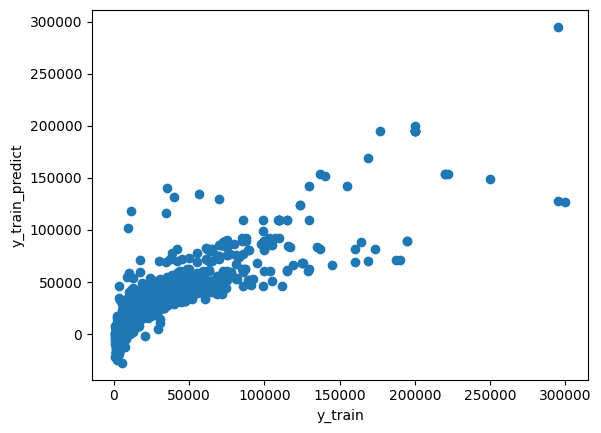

In [79]:
# Linear regression
y_train_predict = lr_model.predict(x_train)
# y_test_predict
plt.scatter(y_train,y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")
plt.show()

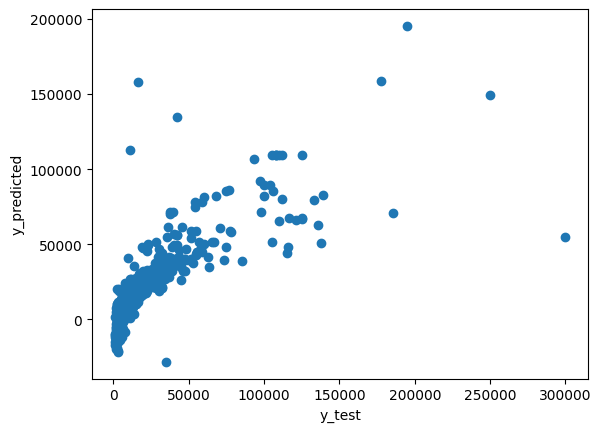

In [80]:
y_test_predict = lr_model.predict(x_test)
# y_test_predict
plt.scatter(y_test,y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

In [82]:
print(lr_model.score(x_train,y_train) *100)
print(lr_model.score(x_test,y_test) *100)

77.5685966196819
64.09292913367783


In [ ]:
# # polynomial regression
# y_train_predict = poly_model.predict(p.fit_transform(x_train))
# plt.scatter(y_train,y_train_predict)
# plt.xlabel("y_train")
# plt.ylabel("y_train_predicted")
# plt.show()

In [ ]:
# y_test_predict = poly_model.predict(p.fit_transform(x_test))
# # y_test_predict
# plt.scatter(y_test,y_test_predict)
# plt.xlabel("y_test")
# plt.ylabel("y_predicted")
# plt.show()

In [ ]:
# print(poly_model.score(p.fit_transform(x_train),y_train) *100)
# print(poly_model.score(p.fit_transform(x_test),y_test) *100)